In [2]:
"""
Python script for use in plotting particles within range of an area of overdensity, and then using their positions
to determine a theoretical velocity for comparison with simualtion data.

"""

import numpy as np 
import math
import scipy.spatial as spatial
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.ndimage as sp

#open positions file
f=open('mbp_positions_063_M13_matched.txt', "r")
lines=f.readlines()

#create empty lists for relevant data 

mass = []
r_200 = []
x = []
y = []
z = []

# append data 
for k in lines:
        mass.append(k.split(  )[11])
        r_200.append(k.split(  )[13])
        x.append(k.split(  )[6])   
        y.append(k.split(  )[7]) 
        z.append(k.split(  )[8])
        
f.close()

#convert list to numpy array for with floats rather than strings 
mass_array = np.array(mass).astype(np.float)

#sort masses over 10^15 from array 
mass_15 = mass_array[mass_array > 1E+5]

#find maximum mass from sample
overdens = np.min(mass_15)
print(overdens)

r=30

# find index of selected mass in array 
result = np.where(mass_array == overdens)
print(result)

103994.7891
(array([19455], dtype=int64),)


In [3]:
# select xyz positions of chosen overdensity
x_0 = x[19455]
y_0 = y[19455]
z_0 = z[19455]
r_vir = r_200[19455]
print(x_0)
print(y_0)
print(z_0)

0.7316458130E+02
0.3858595581E+03
0.4852218018E+03


In [4]:
f=open('radius_test.txt', "r")
lines=f.readlines()

x = []
y = []
z = []

for k in lines:
        x.append(k.split(  )[0])   
        y.append(k.split(  )[1]) 
        z.append(k.split(  )[2]) 
        
f.close()
x_mass = np.array(x).astype(np.float)
y_mass = np.array(y).astype(np.float)
z_mass = np.array(z).astype(np.float)
r_vir = np.array(r_vir).astype(np.float) 

Text(0, 0.5, 'Y ($h^{-1} Mpc$)')

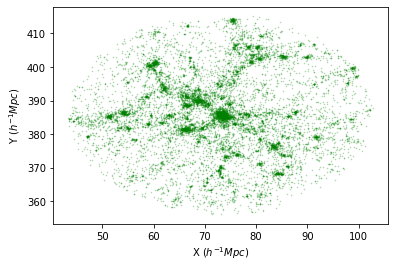

In [5]:
# create plot
fig, ax = plt.subplots()

# populate plot with locations of particles which meet criteria
ax.scatter(x_mass, y_mass, color = 'green', s = 0.3, alpha = 0.3)   
ax.set_xlabel('X ($h^{-1} Mpc$)')
ax.set_ylabel('Y ($h^{-1} Mpc$)')




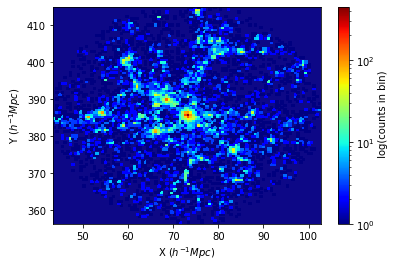

In [6]:
#create density plot of same coords
import matplotlib as mpl
plt.gca().set_facecolor(plt.get_cmap('plasma')(0))
plt.hist2d(x_mass, y_mass, bins=100, norm = mpl.colors.LogNorm(), cmap = plt.cm.jet, alpha = 1)
cb = plt.colorbar()
cb.set_label(' log(counts in bin)')
plt.xlabel('X ($h^{-1} Mpc$)')
plt.ylabel('Y ($h^{-1} Mpc$)')
plt.show()


In [93]:
#define constants for use in velocity equation 
h = 0.73
H_0 = 100 * h 
omega_m = 0.3
omega_lambda = 0.7
f = omega_m**(4/7) + (1 + omega_m/2)*(omega_lambda/70)
delta_c = 1.686
G = 4.301*10**-9

d_M = 100 *overdens *10**10 
#=0

#define sections to simplify equations 

A = (f*delta_c)/3


def B_const(G, d_M, H_0, omega_m, r):
    B = (2*G*d_M)/((H_0**2)*omega_m*r**3)
    return B
    
def V_func(H_0, r, A, B, delta_c):
    V_r = H_0*r*(1 - A*((B+1)**(1/delta_c) - 1))
    return V_r

a_array = np.ones(len(x_mass))

In [94]:
# calculate radial distance and constant values for each particle
B_const_array = np.ones(len(a_array), dtype=np.float64)
V_r_array = np.ones(len(a_array), dtype=np.float64)

for j in range(len(x_mass)):
    a = np.sqrt(((x_mass[j] - float(x_0))**2 + (y_mass[j] - float(y_0))**2 + (z_mass[j] - float(z_0))**2))
    a_array[j] *= a
    


for i in range(len(a_array)):
    B_const(G, d_M, H_0, omega_m, a_array[i])
    
    B_const_array[i] *= B_const(G, d_M, H_0, omega_m, a_array[i])

#calculate theoretical velocity
for k in range(len(a_array)): 
    V_func(H_0, a_array[k], A, B_const_array[k], delta_c)
    V_r_array[k] *= V_func(H_0, a_array[k], A, B_const_array[k], delta_c)



    


Text(0, 0.5, 'Theoretcial Velocity ($Mpc s^{-1}$)')

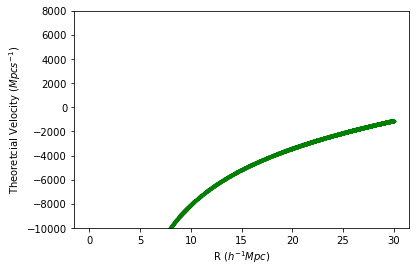

In [95]:
#plot theoretical velocity curve
fig, ax = plt.subplots()

ax.scatter(a_array, V_r_array, color = 'green', s = 5, alpha = 0.5)
ax.set_ylim(-10000,8000)
#ax.set_xlim(0.5,30)
ax.set_xlabel('R ($h^{-1} Mpc$)')
ax.set_ylabel('Theoretcial Velocity ($Mpc s^{-1}$)')
#plt.axhline(y=0, color ='black', alpha = 1)

Text(0.5, 0, 'Z ($h^{-1} Mpc$)')

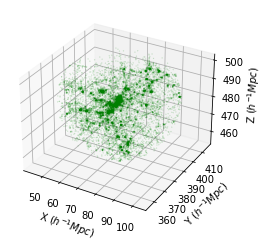

In [96]:
#3d projection of particle positions
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.scatter(x_mass, y_mass, z_mass, s =0.02, alpha = 0.5, color = 'green')
ax.set_xlabel('X ($h^{-1} Mpc$)')
ax.set_ylabel('Y ($h^{-1} Mpc$)')
ax.set_zlabel('Z ($h^{-1} Mpc$)')

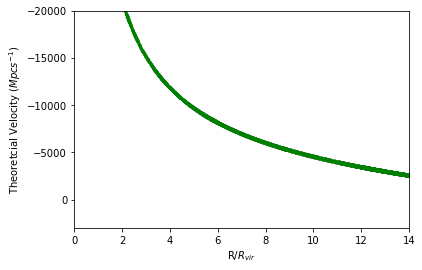

In [97]:
reduced_r = a_array/r_vir
fig, ax = plt.subplots()

ax.scatter(reduced_r, V_r_array, color = 'green', s = 5, alpha = 0.5)
ax.set_ylim(-20000,3000)
ax.set_xlim(0,14)
ax.set_xlabel('R/$R_{vir}$')
ax.set_ylabel('Theoretcial Velocity ($Mpc s^{-1}$)')
ax.invert_yaxis()
